### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings( "ignore" )

### SVM Model

In [2]:
class SVM:
    
    def __init__(self, learning_rate=0.001, n_iters=1000, lambda_parameter=0.01):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.lambda_parameter = lambda_parameter
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        
        self.X = X
        self.y = y
        
        # Implementing Gradient Descent algorithm
        
        for i in range(self.n_iters):
            self.update_weights()
        
        
    # function to update the weight and bias 
    def update_weights(self):
        
        # label encoding
        y_label = np.where(self.y <= 0, -1, 1)
        
        for index, x_i in enumerate(y_label):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            
            if all (condition == True):
                
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
                
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db
                
    def predict(self, X):
        
        output = np.dot(X, self.w) - self.b
        predicted = np.sign(output)
        
        y_final = np.where(predicted <= -1, 0, 1)
        
        return y_final
        

### Importing Dataset

In [3]:
df = pd.read_csv('data.csv')
df = df.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isna().sum() # finds the sum of colomuns with missing val
df=df.dropna(axis=1) # drops the last col with empty val
df.shape

(569, 32)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

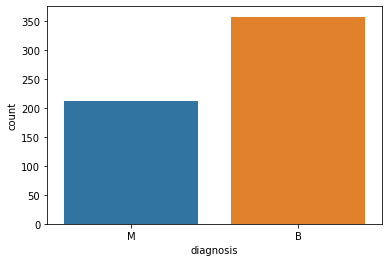

In [5]:
df['diagnosis'].value_counts()
sb.countplot(df['diagnosis'],label='count')

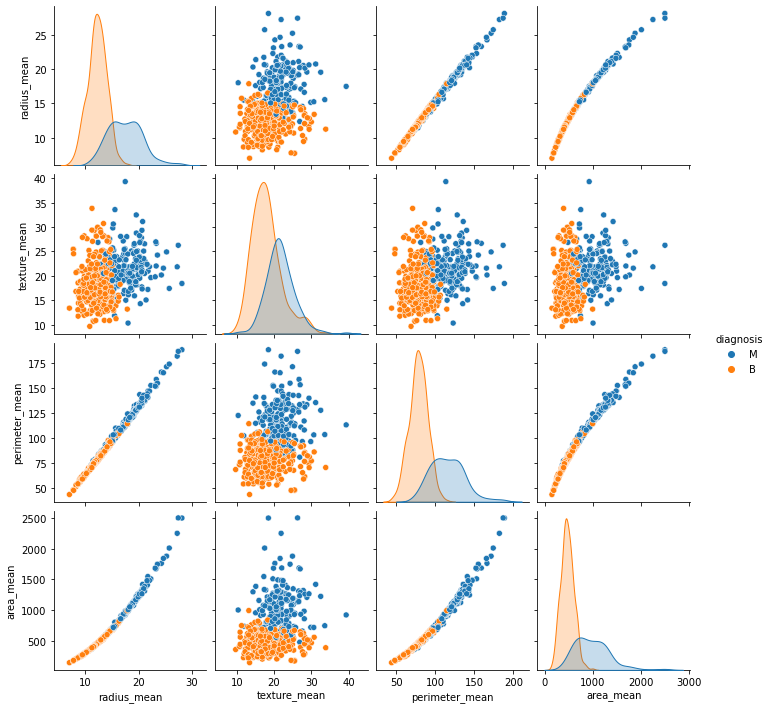

In [6]:
diag=sb.pairplot(df.iloc[:,1:6],hue='diagnosis')
diag.savefig("diag.png")

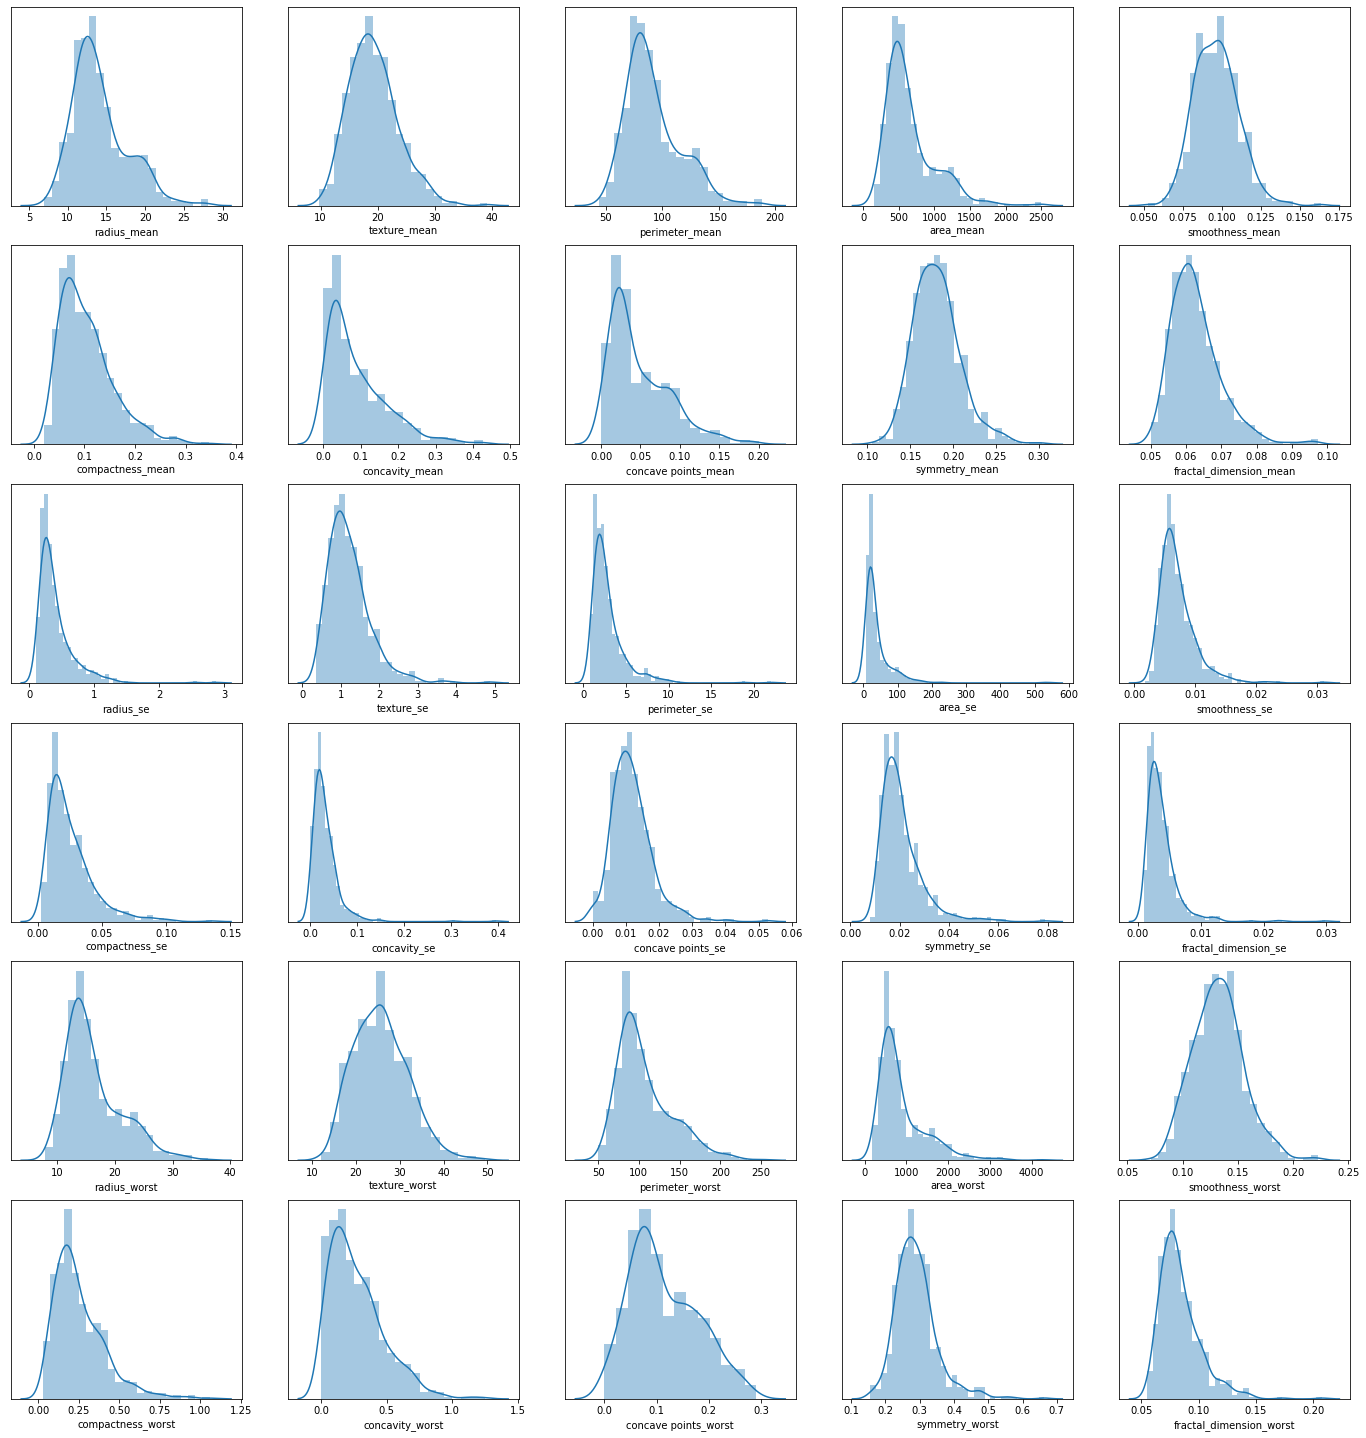

In [7]:
plt.figure(figsize=[24,30])
for i,feature in enumerate(df.iloc[:,2:]):
    plt.subplot(7,5,i+1)
    sb.distplot(df[feature])
    plt.yticks([])
    plt.ylabel('')
    plt.savefig("Out.png")
plt.show()

In [8]:
labelencoder_Y= LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [9]:
#splitting the data the into independent x a nd y data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values

### Splitting Dataset into Training and Testing samples

In [10]:
def trainData_testData_split(X, y, testPercentage, seed=1121):
    np.random.seed(seed)
    randomArray = np.random.rand(X.shape[0])
    splittedData = randomArray < np.percentile(randomArray, int((1 - testPercentage)*100))

    X_train = X[splittedData]
    y_train = y[splittedData]
    X_test  = X[~splittedData]
    y_test  = y[~splittedData]
    
    return X_train, X_test, y_train, y_test


In [11]:
X_train, X_test, y_train, y_test = trainData_testData_split(X, Y,0.25,0)
len(X_train)
len(y_train)

426

In [12]:
class StandardScalers(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transforms(self, X):
        return self.fit(X).transform(X)
sc = StandardScalers()
X_train = sc.fit_transforms(X_train)
X_test = sc.transform(X_test)

### Testing Data with Our Model

In [13]:
model = SVM(learning_rate=0.0001, n_iters=1000, lambda_parameter=0.1)
len(y_train)

426

In [14]:
model.fit(X_train, y_train)
print(model.fit(X_train,y_train))

None


In [25]:
pred  = model.predict(X_test)
print(pred)
print(f'Values Predicted by our Model:\n {pred}')

[1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0]
Values Predicted by our Model:
 [1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0]


In [24]:
def get_confusion_matrix(l1, l2):

    assert len(l1)==len(l2), "Two lists have different size."

    K = len(np.unique(l1))

    # create label-index value
    label_index = dict(zip(np.unique(l1), np.arange(K)))

    result = np.zeros((K, K))
    for i in range(len(l1)):
        result [label_index[l1[i]]][label_index[l2[i]]] += 1
    

    return result.astype(int)
x=get_confusion_matrix(y_test,model.predict(X_test))
#type(model.predict(X_test))
# print(x)

numpy.ndarray

-----------------
[[81 10]
 [ 7 45]]
81
10
7
45
Accuracy of the SVM is :0.8811188811188811
recall of the SVM is : 0.9204545454545454
precision of the SVM is :0.8901098901098901
F_1 Score of the SVM is :0.9050279329608938
AUC
False_Positive_rate of the SVM is : 0.18181818181818182
False_Negitive_rate of the SVM is : 0.07954545454545454
True_Negitive_Rate  of the SVM is: 0.8181818181818182
True positivetity rate of the SVM is : 0.9204545454545454
Misclassification Rate of the SVM is : 0.11888111888111888
Prevalence of the SVM is : 81.04895104895105
143
HEATMAP


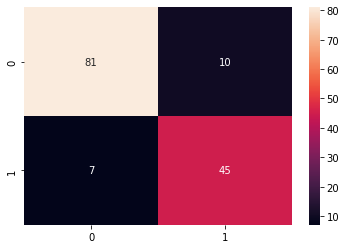

In [19]:
print('-----------------')
print(x)
TP=x[0][0]
TP=int(TP)
FP=x[0][1]
FP=int(FP)
FN=x[1][0]
FN=int(FN)
TN=x[1][1]
TN=int(TN)
print(TP)
print(FP)
print(FN)
print(TN)
xax=TP+TN+FN+FP
Accuracy=(TP+TN)/(TP+TN+FN+FP)
recall= TP/(TP+FN)  # True positivetity rate
precision=TP/(TP+FP) #
f_1= 2*(recall*precision)/(precision+recall)
True_positivetity_rate= TP/(FN+TP)
True_Negitive_Rate=TN/(TN+FP)
False_Positive_rate= FP/(TN+FP)
false_negitive_rate = FN/(FN+TP)
mis_rate=(FP+FN)/xax # Error Rate
Prevalence=TP+FN/xax
print(f'Accuracy of the SVM is :{Accuracy}')
print(f'recall of the SVM is : {recall}')
print(f'precision of the SVM is :{precision}')
print(f'F_1 Score of the SVM is :{f_1}')
print("AUC")
print(f'False_Positive_rate of the SVM is : {False_Positive_rate}')
print(f'False_Negitive_rate of the SVM is : {false_negitive_rate}')
print(f'True_Negitive_Rate  of the SVM is: {True_Negitive_Rate}')
print(f'True positivetity rate of the SVM is : {True_positivetity_rate}')
print(f'Misclassification Rate of the SVM is : {mis_rate}')
print(f'Prevalence of the SVM is : {Prevalence}')
print(xax)
print("HEATMAP")
y=sb.heatmap(x ,annot=True)
figure = y.get_figure()
plt.show()
figure.savefig(f'confusionmatrix of SVM.png')

In [18]:
# 17/143

0.11888111888111888

In [20]:
# 7/55

0.12727272727272726